In [161]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.simplefilter('ignore')

In [163]:

df=pd.read_excel(r"C:\Users\Asus\OneDrive\Desktop\class Project\CH_2_Business_Prediction\Coffee_shop_data.xlsx")

In [165]:
df.head()

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price
0,1,Brew Haven,8 Old Shore Place,Oakland,California,94616,415-810-4769,4.5,Male,72463,3.31000
1,2,Bean Bliss,6650 Clarendon Crossing,Stockton,California,95210,209-701-1665,5.0,Female,87117,5.35000
2,3,Caffeine Cove,7281 Buell Road,Fresno,California,93773,559-137-3554,4.7,Male,86394,4.15000
3,4,Mug Magic,670 Jackson Avenue,Torrance,California,90510,818-789-5573,4.3,Male,88343,5.34000
4,5,Daily Grind,37 Ludington Terrace,San Diego,California,92196,619-354-2389,1.6,Male,77795,4.51175


In [167]:
population=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\class Project\CH_2_Business_Prediction\population.csv",skiprows=[0])
population

,Geography,Label for GEO_ID,Race/Ethnic Group,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
0,8600000US89010,ZCTA5 89010,1,Total population,172,NaN,51,69,19,12,12,4,5
1,8600000US89019,ZCTA5 89019,1,Total population,1164,NaN,412,421,134,83,57,32,25
2,8600000US89060,ZCTA5 89060,1,Total population,4144,NaN,1106,1714,550,361,222,95,96
3,8600000US89061,ZCTA5 89061,1,Total population,2109,NaN,469,936,283,206,112,62,41
4,8600000US89439,ZCTA5 89439,1,Total population,671,NaN,193,314,88,55,17,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,8600000US96146,ZCTA5 96146,1,Total population,588,NaN,203,210,75,68,23,7,2
1701,8600000US96148,ZCTA5 96148,1,Total population,318,NaN,92,113,42,35,21,8,7
1702,8600000US96150,ZCTA5 96150,1,Total population,12436,NaN,3719,4525,1861,1343,607,230,151
1703,8600000US96161,ZCTA5 96161,1,Total population,7293,NaN,1600,2794,1266,1065,396,113,59


In [169]:
population.head()

,Geography,Label for GEO_ID,Race/Ethnic Group,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
0,8600000US89010,ZCTA5 89010,1,Total population,172,NaN,51,69,19,12,12,4,5
1,8600000US89019,ZCTA5 89019,1,Total population,1164,NaN,412,421,134,83,57,32,25
2,8600000US89060,ZCTA5 89060,1,Total population,4144,NaN,1106,1714,550,361,222,95,96
3,8600000US89061,ZCTA5 89061,1,Total population,2109,NaN,469,936,283,206,112,62,41
4,8600000US89439,ZCTA5 89439,1,Total population,671,NaN,193,314,88,55,17,2,2


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID no.           1000 non-null   int64  
 1   Business Name    1000 non-null   object 
 2   Street address   1000 non-null   object 
 3   City             1000 non-null   object 
 4   State            1000 non-null   object 
 5   Zip Code         1000 non-null   int64  
 6   Phone            1000 non-null   object 
 7   Rating           1000 non-null   float64
 8   Gender majority  1000 non-null   object 
 9   Median Salary    1000 non-null   int64  
 10  Latte Price      1000 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 86.1+ KB


In [173]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Geography                          1705 non-null   object 
 1   Label for GEO_ID                   1705 non-null   object 
 2   Race/Ethnic Group                  1705 non-null   int64  
 3   Population Groups                  1705 non-null   object 
 4   Total                              1705 non-null   int64  
 5   Errata of Total                    0 non-null      float64
 6   Total!!1-person household          1705 non-null   int64  
 7   Total!!2-person household          1705 non-null   int64  
 8   Total!!3-person household          1705 non-null   int64  
 9   Total!!4-person household          1705 non-null   int64  
 10  Total!!5-person household          1705 non-null   int64  
 11  Total!!6-person household          1705 non-null   int64

In [175]:
df.shape

(1000, 11)

In [177]:
population.shape

(1705, 13)

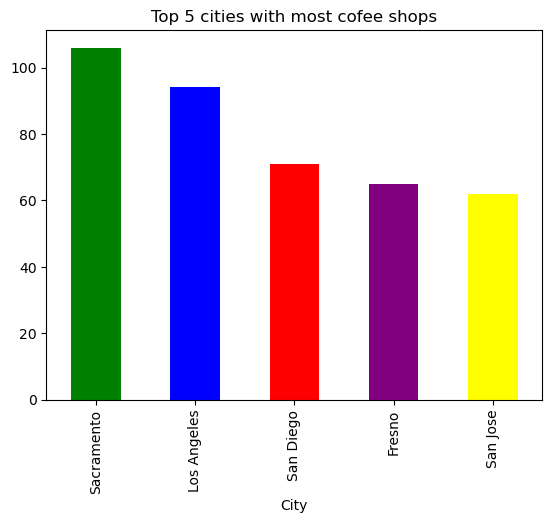

In [179]:
ax=df['City'].value_counts().head(5).plot(kind='bar',color=["green","blue","red","purple","yellow"])
ax.set_title('Top 5 cities with most cofee shops')
plt.show()

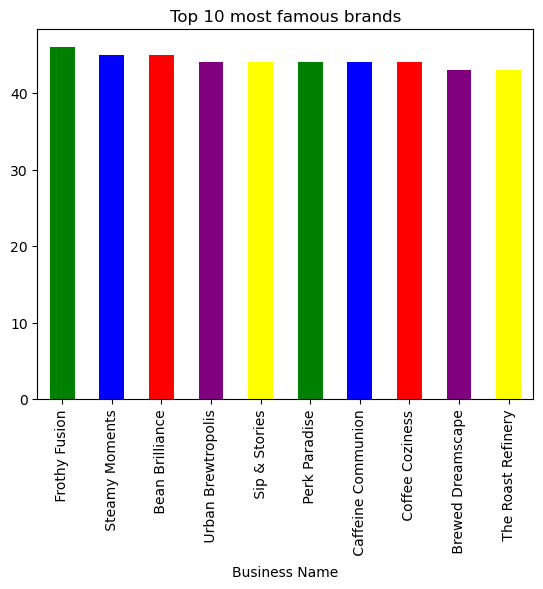

In [181]:
ax=df['Business Name'].value_counts().head(10).plot(kind='bar',color=["green","blue","red","purple","yellow"])
ax.set_title('Top 10 most famous brands')
plt.show()

In [183]:
df.isna().sum()  #no null value

ID no.             0
Business Name      0
Street address     0
City               0
State              0
Zip Code           0
Phone              0
Rating             0
Gender majority    0
Median Salary      0
Latte Price        0
dtype: int64

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID no.           1000 non-null   int64  
 1   Business Name    1000 non-null   object 
 2   Street address   1000 non-null   object 
 3   City             1000 non-null   object 
 4   State            1000 non-null   object 
 5   Zip Code         1000 non-null   int64  
 6   Phone            1000 non-null   object 
 7   Rating           1000 non-null   float64
 8   Gender majority  1000 non-null   object 
 9   Median Salary    1000 non-null   int64  
 10  Latte Price      1000 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 86.1+ KB


In [ ]:
# convert zip code to object for joining purpose

In [187]:
df['Zip Code']=df['Zip Code'].astype(str)

In [ ]:
# extract zip code from population
#find all zip code that has 5 digit pattern.last 5 digit

In [189]:
def find_zip_code(geocode):
    pattern = r'\d{5}$'

    match = re.search(pattern, geocode)

    if match:
        zip_code = match.group(0)
    return zip_code


In [191]:
find_zip_code('8600000US89010')

'89010'

In [193]:
population['Zip Code']=population['Geography'].apply(find_zip_code)

In [195]:
population

,Geography,Label for GEO_ID,Race/Ethnic Group,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household,Zip Code
0,8600000US89010,ZCTA5 89010,1,Total population,172,NaN,51,69,19,12,12,4,5,89010
1,8600000US89019,ZCTA5 89019,1,Total population,1164,NaN,412,421,134,83,57,32,25,89019
2,8600000US89060,ZCTA5 89060,1,Total population,4144,NaN,1106,1714,550,361,222,95,96,89060
3,8600000US89061,ZCTA5 89061,1,Total population,2109,NaN,469,936,283,206,112,62,41,89061
4,8600000US89439,ZCTA5 89439,1,Total population,671,NaN,193,314,88,55,17,2,2,89439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,8600000US96146,ZCTA5 96146,1,Total population,588,NaN,203,210,75,68,23,7,2,96146
1701,8600000US96148,ZCTA5 96148,1,Total population,318,NaN,92,113,42,35,21,8,7,96148
1702,8600000US96150,ZCTA5 96150,1,Total population,12436,NaN,3719,4525,1861,1343,607,230,151,96150
1703,8600000US96161,ZCTA5 96161,1,Total population,7293,NaN,1600,2794,1266,1065,396,113,59,96161


In [197]:
cafe_data=df.copy()
cafe_data

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price
0,1,Brew Haven,8 Old Shore Place,Oakland,California,94616,415-810-4769,4.50,Male,72463,3.31000
1,2,Bean Bliss,6650 Clarendon Crossing,Stockton,California,95210,209-701-1665,5.00,Female,87117,5.35000
2,3,Caffeine Cove,7281 Buell Road,Fresno,California,93773,559-137-3554,4.70,Male,86394,4.15000
3,4,Mug Magic,670 Jackson Avenue,Torrance,California,90510,818-789-5573,4.30,Male,88343,5.34000
4,5,Daily Grind,37 Ludington Terrace,San Diego,California,92196,619-354-2389,1.60,Male,77795,4.51175
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Sip & Stories,7 Mockingbird Park,San Bernardino,California,92424,909-425-9949,1.78,Male,82834,6.48000
996,997,Perk Paradise,8 Cody Street,Burbank,California,91520,818-845-1356,4.50,Male,80753,3.65000
997,998,Urban Brewtropolis,141 Burrows Place,Los Angeles,California,90035,323-785-4094,3.00,Male,87604,4.64000
998,999,Steamy Moments,42004 Bellgrove Terrace,Orange,California,92867,714-506-9394,4.50,Male,74340,3.82000


In [ ]:
# merge two data set

In [199]:
df=pd.merge(cafe_data,population)

In [201]:
df

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,...,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
0,2,Bean Bliss,6650 Clarendon Crossing,Stockton,California,95210,209-701-1665,5.00,Female,87117,...,Total population,11180,NaN,1995,2469,1841,1873,1339,786,877
1,6,Espresso Elegance,8427 Atwood Road,Visalia,California,93291,559-929-4731,1.20,Female,78753,...,Total population,15310,NaN,2520,3892,2500,2694,1793,996,915
2,10,Perk Palace,7 David Junction,Fresno,California,93726,559-323-2365,4.20,Female,80973,...,Total population,13942,NaN,3434,3776,2458,1957,1140,565,612
3,11,The Coffee Cartel,6018 Rockefeller Center,Orange,California,92867,714-292-8390,1.90,Male,74340,...,Total population,13284,NaN,1989,3743,2431,2551,1328,615,627
4,14,Grindhouse Cafe,7846 Cherokee Junction,Visalia,California,93291,559-253-9426,4.50,Male,78753,...,Total population,15310,NaN,2520,3892,2500,2694,1793,996,915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,982,Perk Paradise,4 Park Meadow Crossing,Van Nuys,California,91411,818-584-8823,4.00,Female,76034,...,Total population,9177,NaN,2816,2479,1474,1208,652,278,270
408,983,Urban Brewtropolis,2459 Golden Leaf Place,Santa Monica,California,90405,818-215-2671,4.82,Female,86920,...,Total population,14376,NaN,6879,4527,1554,1017,280,81,38
409,985,Caffeine Communion,40 Sommers Parkway,San Jose,California,95133,408-304-3646,4.04,Female,78176,...,Total population,7365,NaN,949,1791,1485,1417,807,437,479
410,998,Urban Brewtropolis,141 Burrows Place,Los Angeles,California,90035,323-785-4094,3.00,Male,87604,...,Total population,12814,NaN,4807,4269,1702,1155,519,215,147


In [203]:
df.shape

(412, 24)

In [45]:
columns=cafe_data.columns.values.tolist()+['Total']
df=df[columns]

In [131]:
df

,Zip Code,Rating,Median Salary,Latte Price,Population
0,95210,5.00,87117,5.35000,11180
1,93291,1.20,78753,5.31765,15310
2,93726,4.20,80973,5.30665,13942
3,92867,1.90,74340,4.43900,13284
4,93291,4.50,78753,5.27165,15310
...,...,...,...,...,...
407,91411,4.00,76034,4.99170,9177
408,90405,4.82,86920,4.98200,14376
409,95133,4.04,78176,4.64680,7365
410,90035,3.00,87604,4.64000,12814


In [205]:
df=df.rename(columns={"Total":"Population"})

In [207]:
df

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,...,Population Groups,Population,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
0,2,Bean Bliss,6650 Clarendon Crossing,Stockton,California,95210,209-701-1665,5.00,Female,87117,...,Total population,11180,NaN,1995,2469,1841,1873,1339,786,877
1,6,Espresso Elegance,8427 Atwood Road,Visalia,California,93291,559-929-4731,1.20,Female,78753,...,Total population,15310,NaN,2520,3892,2500,2694,1793,996,915
2,10,Perk Palace,7 David Junction,Fresno,California,93726,559-323-2365,4.20,Female,80973,...,Total population,13942,NaN,3434,3776,2458,1957,1140,565,612
3,11,The Coffee Cartel,6018 Rockefeller Center,Orange,California,92867,714-292-8390,1.90,Male,74340,...,Total population,13284,NaN,1989,3743,2431,2551,1328,615,627
4,14,Grindhouse Cafe,7846 Cherokee Junction,Visalia,California,93291,559-253-9426,4.50,Male,78753,...,Total population,15310,NaN,2520,3892,2500,2694,1793,996,915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,982,Perk Paradise,4 Park Meadow Crossing,Van Nuys,California,91411,818-584-8823,4.00,Female,76034,...,Total population,9177,NaN,2816,2479,1474,1208,652,278,270
408,983,Urban Brewtropolis,2459 Golden Leaf Place,Santa Monica,California,90405,818-215-2671,4.82,Female,86920,...,Total population,14376,NaN,6879,4527,1554,1017,280,81,38
409,985,Caffeine Communion,40 Sommers Parkway,San Jose,California,95133,408-304-3646,4.04,Female,78176,...,Total population,7365,NaN,949,1791,1485,1417,807,437,479
410,998,Urban Brewtropolis,141 Burrows Place,Los Angeles,California,90035,323-785-4094,3.00,Male,87604,...,Total population,12814,NaN,4807,4269,1702,1155,519,215,147


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID no.           412 non-null    int64  
 1   Business Name    412 non-null    object 
 2   Street address   412 non-null    object 
 3   City             412 non-null    object 
 4   State            412 non-null    object 
 5   Zip Code         412 non-null    object 
 6   Phone            412 non-null    object 
 7   Rating           412 non-null    float64
 8   Gender majority  412 non-null    object 
 9   Median Salary    412 non-null    int64  
 10  Latte Price      412 non-null    float64
 11  Population       412 non-null    int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 38.8+ KB


In [53]:
df= df[['Zip Code','Rating','Median Salary','Latte Price','Population']]
df

,Zip Code,Rating,Median Salary,Latte Price,Population
0,95210,5.00,87117,5.35000,11180
1,93291,1.20,78753,5.31765,15310
2,93726,4.20,80973,5.30665,13942
3,92867,1.90,74340,4.43900,13284
4,93291,4.50,78753,5.27165,15310
...,...,...,...,...,...
407,91411,4.00,76034,4.99170,9177
408,90405,4.82,86920,4.98200,14376
409,95133,4.04,78176,4.64680,7365
410,90035,3.00,87604,4.64000,12814


In [211]:
coffee_shop_counts = df['Zip Code'].value_counts().reset_index()
coffee_shop_counts

,Zip Code,count
0,90040,11
1,93111,10
2,90505,10
3,92410,10
4,92867,9
...,...,...
74,90305,2
75,91103,2
76,94611,1
77,95118,1


In [57]:
coffee_shop_counts.columns = ['Zip Code', 'CoffeeShopCount']
coffee_shop_counts

,Zip Code,CoffeeShopCount
0,90040,11
1,93111,10
2,90505,10
3,92410,10
4,92867,9
...,...,...
74,90305,2
75,91103,2
76,94611,1
77,95118,1


In [59]:
coffee_shop_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Zip Code         79 non-null     object
 1   CoffeeShopCount  79 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Zip Code       412 non-null    object 
 1   Rating         412 non-null    float64
 2   Median Salary  412 non-null    int64  
 3   Latte Price    412 non-null    float64
 4   Population     412 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 16.2+ KB


In [61]:
df['Zip Code'] = df['Zip Code'].astype(str)
coffee_shop_counts['Zip Code'] = coffee_shop_counts['Zip Code'].astype(str)

In [63]:
coffee_shop_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Zip Code         79 non-null     object
 1   CoffeeShopCount  79 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [65]:
# Merge ( use left join)
df = df.merge(coffee_shop_counts, on='Zip Code', how='left')

In [67]:
df

,Zip Code,Rating,Median Salary,Latte Price,Population,CoffeeShopCount
0,95210,5.00,87117,5.35000,11180,4
1,93291,1.20,78753,5.31765,15310,7
2,93726,4.20,80973,5.30665,13942,5
3,92867,1.90,74340,4.43900,13284,9
4,93291,4.50,78753,5.27165,15310,7
...,...,...,...,...,...,...
407,91411,4.00,76034,4.99170,9177,8
408,90405,4.82,86920,4.98200,14376,3
409,95133,4.04,78176,4.64680,7365,6
410,90035,3.00,87604,4.64000,12814,5


In [ ]:
# Criteria:
# a. High population
# b. Low total number of coffee shops
# c. Low ratings
# d. High median salary

In [69]:
sorted_df = df.sort_values(by=['Population', 'CoffeeShopCount', 'Rating', 'Median Salary'],
                           ascending=[False, True, True, False])

In [71]:
sorted_df.head()

,Zip Code,Rating,Median Salary,Latte Price,Population,CoffeeShopCount
260,94110,2.22,74020,5.045,27128,5
374,94110,3.50,74020,5.047,27128,5
311,94110,4.40,74020,5.059,27128,5
388,94110,4.50,74020,4.779,27128,5
9,94110,4.70,74020,4.581,27128,5


In [73]:
lst=[]
for i in range(len(sorted_df)):
    if len(lst)!=5:
        if (sorted_df['Zip Code'][i]) not in lst:
            lst.append(sorted_df['Zip Code'][i])
            
# Filter 'sorted_df' to include only rows where 'Zip Code' is in 'lst'
top_5_zip_codes_df = sorted_df[sorted_df['Zip Code'].isin(lst)]

top_5_zip_codes_df

,Zip Code,Rating,Median Salary,Latte Price,Population,CoffeeShopCount
1,93291,1.20,78753,5.31765,15310,7
329,93291,1.25,78753,4.69765,15310,7
242,93291,2.97,78753,5.13965,15310,7
273,93291,4.13,78753,5.11365,15310,7
199,93291,4.29,78753,4.95365,15310,7
213,93291,4.30,78753,5.21365,15310,7
4,93291,4.50,78753,5.27165,15310,7
91,93726,1.25,80973,4.88865,13942,5
111,93726,1.55,80973,4.92065,13942,5
278,93726,4.17,80973,5.32665,13942,5


In [75]:
X = df.drop(['Latte Price', 'Zip Code'], axis=1)  # Features excluding 'Latte Price' and 'Zip Code'
X

,Rating,Median Salary,Population,CoffeeShopCount
0,5.00,87117,11180,4
1,1.20,78753,15310,7
2,4.20,80973,13942,5
3,1.90,74340,13284,9
4,4.50,78753,15310,7
...,...,...,...,...
407,4.00,76034,9177,8
408,4.82,86920,14376,3
409,4.04,78176,7365,6
410,3.00,87604,12814,5


In [81]:
Y = df['Latte Price']  # Target variable
Y

0      5.35000
1      5.31765
2      5.30665
3      4.43900
4      5.27165
        ...   
407    4.99170
408    4.98200
409    4.64680
410    4.64000
411    3.82000
Name: Latte Price, Length: 412, dtype: float64

In [87]:
X = df.drop("Latte Price", axis=1)  # features
y = df["Latte Price"]               # target/labels


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [93]:
#Model Selection
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [95]:
#Hyperparameter Tuning
param_grid = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 10]},
}

In [97]:
for model_name, model in models.items():
    if model_name in param_grid:
        # Perform hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X, y)

        # Set the best hyperparameters to the model
        models[model_name] = grid_search.best_estimator_

In [98]:
#Model Training
for model_name, model in models.items():
    # Train the model on the training set
    model.fit(X_train, y_train)

In [101]:
# Model Evaluation
for model_name, model in models.items():
    # Evaluate the model on the testing set
    y_pred = model.predict(X_test)
    print(f"{model_name} Metrics:")
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R-squared:", r2_score(y_test, y_pred))
    print()

Linear Regression Metrics:
Mean Absolute Error: 0.21935772737116294
Mean Squared Error: 0.06768991171930375
R-squared: 0.42758226103307917

Random Forest Metrics:
Mean Absolute Error: 0.23220591098714202
Mean Squared Error: 0.07724618511608065
R-squared: 0.34676991733529905

Gradient Boosting Metrics:
Mean Absolute Error: 0.21856859172032925
Mean Squared Error: 0.06726806279414392
R-squared: 0.43114961400772855



In [107]:
zip_codes_df = top_5_zip_codes_df.drop(['Latte Price'], axis=1)  # keep Zip Code
zip_codes_df = sc.transform(zip_codes_df)


In [109]:
for model_name, model in models.items():
    # Predict the prices for lattes in the top 5 zip codes
    predicted_prices = model.predict(zip_codes_df)
    print(f"{model_name} Predicted Prices for Top 5 Zip Codes:")
    print(predicted_prices)
    print()

Linear Regression Predicted Prices for Top 5 Zip Codes:
[4.98880835 4.98862628 4.98236292 4.9781388  4.97755616 4.97751975
 4.97679145 5.07622736 5.07513491 5.06559422 5.06548498 5.06257179
 4.8046583  4.80458547 4.80057984 4.79657421 4.79657421 4.79650138
 4.79537252 4.79511761 4.79511761 5.31418321 5.31305435 5.31214398
 5.31123361 5.28245993 5.28209578 5.28129466 5.28100334 5.28085768
 5.27929184 5.27892769 5.27885486]

Random Forest Predicted Prices for Top 5 Zip Codes:
[5.13136713 4.89105641 5.08987077 5.09913514 5.06522538 5.13249428
 5.16322714 4.94970884 5.01530426 5.24668406 5.25380651 5.06769815
 4.68777088 4.56165801 4.75069784 4.63075109 4.63075109 4.63075109
 4.56959654 4.46663344 4.46663344 5.22630131 5.32261582 5.3456349
 5.33666443 5.10840487 5.16273445 5.18597474 5.32802155 5.42248033
 5.23859058 5.1896293  5.40128865]

Gradient Boosting Predicted Prices for Top 5 Zip Codes:
[5.05381262 5.05381262 5.06467243 5.06467243 5.06467243 5.06467243
 5.06467243 5.03517364 5.098

In [111]:
predictions = {}

for model_name, model in models.items():
    # Predict the prices for lattes in the top 5 zip codes
    predicted_prices = model.predict(zip_codes_df)
    predictions[model_name] = predicted_prices

# Convert the predictions dictionary to a DataFrame
predictions_df = pd.DataFrame(predictions)
# Add the zip codes to the predictions DataFrame
predictions_df['Zip Code'] = top_5_zip_codes_df['Zip Code'].values

# Rearrange the columns to have 'Zip Code' as the first column
cols = ['Zip Code'] + [col for col in predictions_df.columns if col != 'Zip Code']
predictions_df = predictions_df[cols]

predictions_df

,Zip Code,Linear Regression,Random Forest,Gradient Boosting
0,93291,4.988808,5.131367,5.053813
1,93291,4.988626,4.891056,5.053813
2,93291,4.982363,5.089871,5.064672
3,93291,4.978139,5.099135,5.064672
4,93291,4.977556,5.065225,5.064672
5,93291,4.977520,5.132494,5.064672
6,93291,4.976791,5.163227,5.064672
7,93726,5.076227,4.949709,5.035174
8,93726,5.075135,5.015304,5.098191
9,93726,5.065594,5.246684,5.098762


In [113]:
agg_df = predictions_df.groupby('Zip Code')['Gradient Boosting'].agg([("Highest", "max"), ("Lowest", "min")]).reset_index()
agg_df.columns = ['Zip Code', 'Highest', 'Lowest']
print(agg_df)

  Zip Code   Highest    Lowest
0    92662  5.250901  5.245946
1    92867  4.767003  4.767003
2    93291  5.064672  5.053813
3    93726  5.098762  5.035174
4    95210  5.240045  5.240045
